### ----------------------------------------------------**Meta Data**---------------------------------------------------
- ***This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:***
- ***X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit***
- ***X2: Gender (1 = male; 2 = female).***
- ***X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).***
- ***X4: Marital status (1 = married; 2 = single; 3 = others).***
- ***X5: Age (year).***
- ***X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.***
- ***X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.***
- ***X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005***.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("default of credit card clients.xls", skiprows=1)


In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# We havn't need of ID Column so, drop it.
df.drop("ID", axis=1, inplace=True)

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# check for missing values >> No missing values
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
# Check for duplicate values 
print(df.duplicated().sum())


35


In [8]:
# Yes 35 duplicate rows found drop it
df.drop_duplicates(inplace=True)


In [9]:
print(df.duplicated().sum())


0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29965 non-null  int64
 1   SEX                         29965 non-null  int64
 2   EDUCATION                   29965 non-null  int64
 3   MARRIAGE                    29965 non-null  int64
 4   AGE                         29965 non-null  int64
 5   PAY_0                       29965 non-null  int64
 6   PAY_2                       29965 non-null  int64
 7   PAY_3                       29965 non-null  int64
 8   PAY_4                       29965 non-null  int64
 9   PAY_5                       29965 non-null  int64
 10  PAY_6                       29965 non-null  int64
 11  BILL_AMT1                   29965 non-null  int64
 12  BILL_AMT2                   29965 non-null  int64
 13  BILL_AMT3                   29965 non-null  int64
 14  BILL_AMT4  

In [11]:
# Let's view Stats Summury 
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.853629,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,0.489128,0.790411,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
df.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
from scipy import stats

# Calculate mode across the 6-month columns row-wise
df['MODE_PAY_STATUS'] = df[['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mode(axis=1, numeric_only=True)[0]

df['MODE_BILL_AMT'] = df[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mode(axis=1, numeric_only=True)[0]

df['MODE_PAY_AMT'] = df[[ 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mode(axis=1, numeric_only=True)[0]

In [14]:
df = df.drop(columns=[ 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 
        'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [15]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'default payment next month', 'MODE_PAY_STATUS', 'MODE_BILL_AMT',
       'MODE_PAY_AMT'],
      dtype='object')

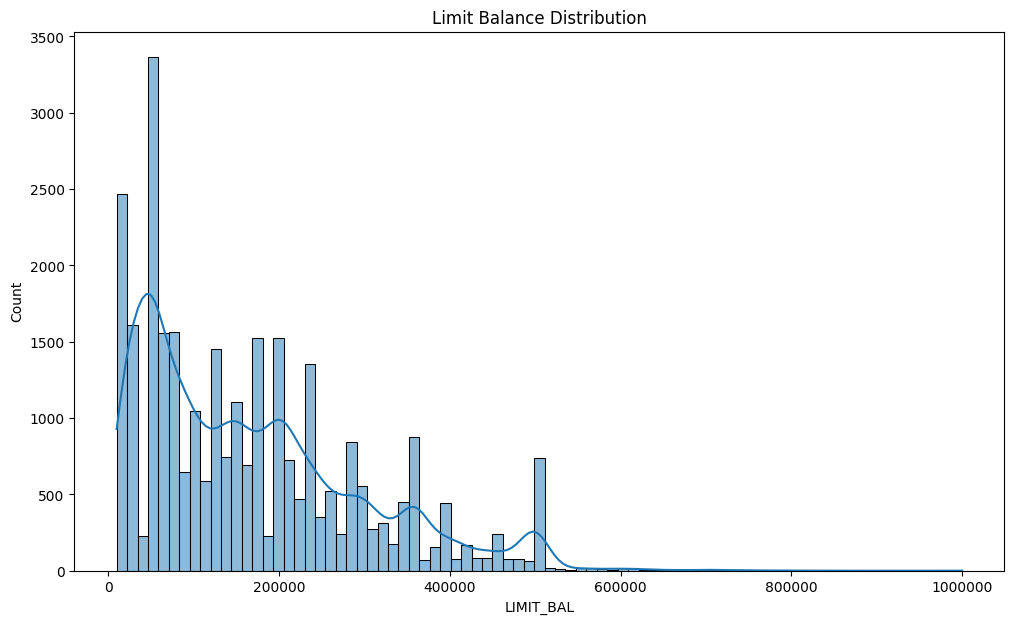

In [16]:
# Univariate analysis
plt.figure(figsize=(12,7))
sns.histplot(data = df, x = 'LIMIT_BAL', kde=True)
plt.title('Limit Balance Distribution')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

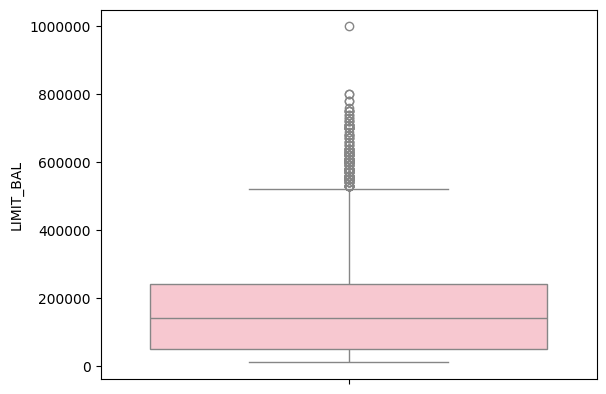

In [17]:
# max credit limit is in between 0 - 100000
# Right skewed data check outliers usign boxplot
sns.boxplot(df['LIMIT_BAL'], color='pink')
plt.ticklabel_format(style='plain',axis='y')
plt.show()


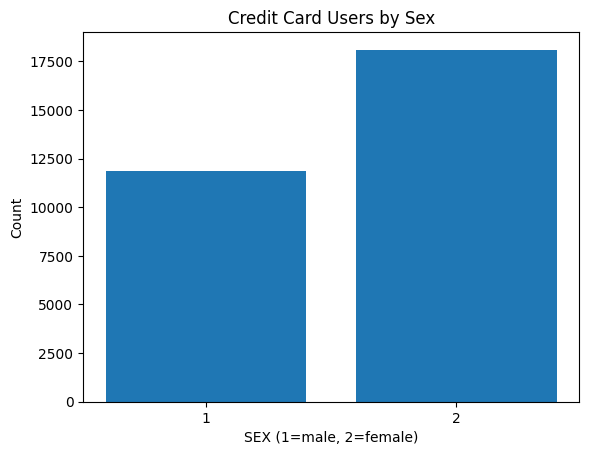

In [18]:
# plot count of male (1) vs female (2)
sex_counts = df['SEX'].value_counts().sort_index()
plt.bar(sex_counts.index.astype(str), sex_counts.values)
plt.xlabel('SEX (1=male, 2=female)')
plt.ylabel('Count')
plt.title('Credit Card Users by Sex')
plt.show()

In [19]:
# Female's uses credit card more than male's

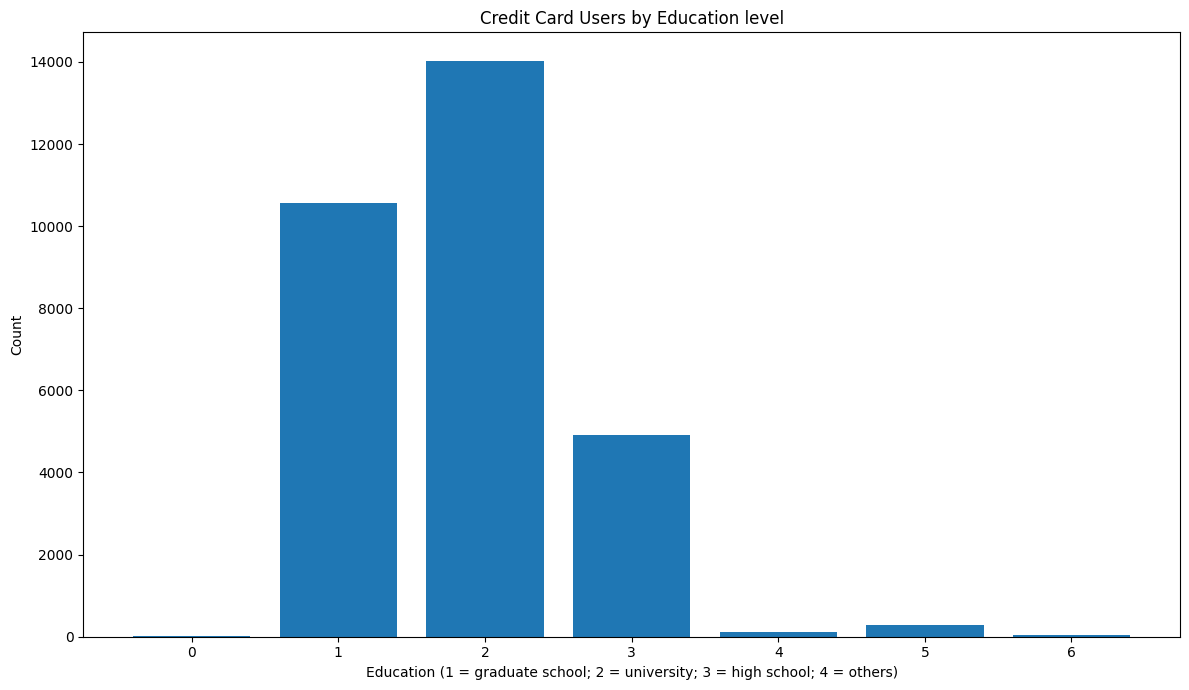

In [20]:
edu= df.EDUCATION.value_counts().sort_index()
plt.figure(figsize=(12,7))
plt.bar(edu.index.astype(str), edu.values)
plt.xlabel('Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)')
plt.ylabel('Count')
plt.title('Credit Card Users by Education level')
plt.tight_layout()
plt.show()


In [21]:
#most of the credit card users are graduate and universitty educated

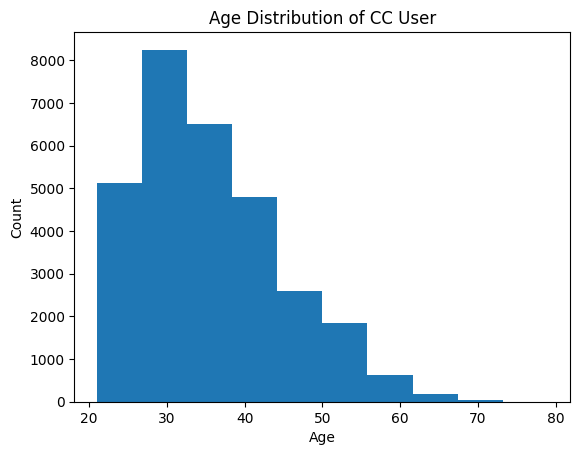

In [22]:
plt.hist(df.AGE)
plt.title('Age Distribution of CC User')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [23]:
# most of the credit card users are in age group of 20-40 years

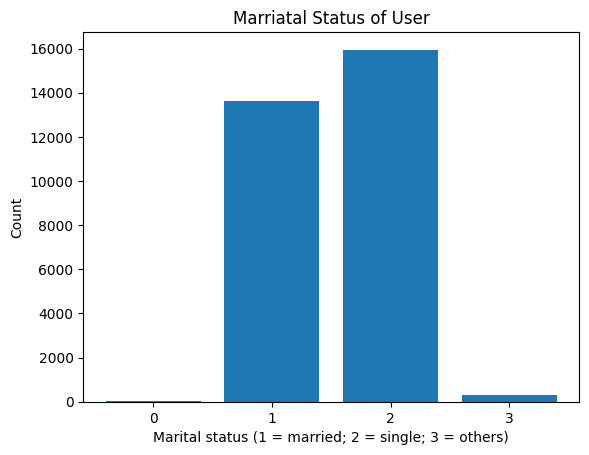

In [24]:
marriage_count = df.MARRIAGE.value_counts().sort_index()
plt.bar(marriage_count.index.astype(str), marriage_count.values)
plt.title('Marriatal Status of User')
plt.xlabel('Marital status (1 = married; 2 = single; 3 = others)')
plt.ylabel('Count')
plt.show()

In [25]:
# Most of the credit card users are single

In [26]:
# Bivariate Analysis
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'default payment next month', 'MODE_PAY_STATUS', 'MODE_BILL_AMT',
       'MODE_PAY_AMT'],
      dtype='object')

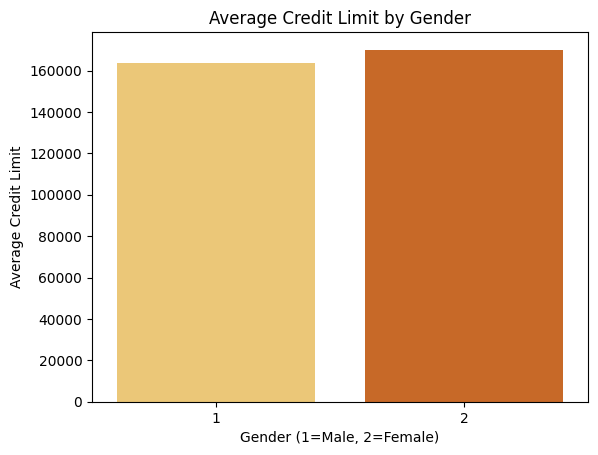

In [27]:
sns.barplot(x='SEX', y='LIMIT_BAL', data=df, estimator='mean', ci=None, palette='YlOrBr')
plt.title('Average Credit Limit by Gender')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Average Credit Limit')
plt.show()

In [28]:
# female users have higher average credit limit

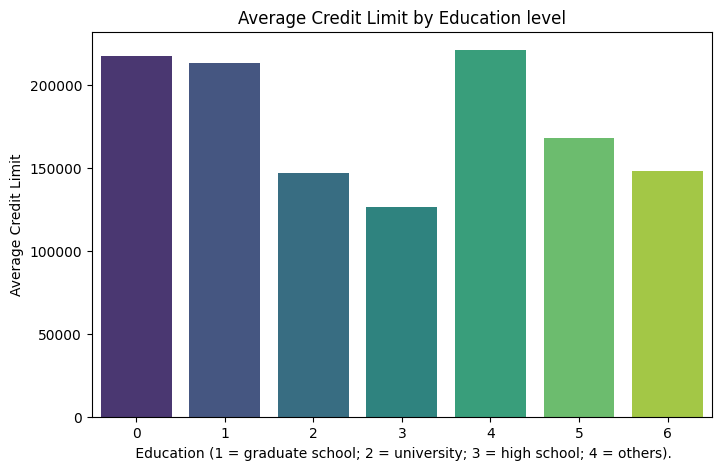

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='EDUCATION', y='LIMIT_BAL', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average Credit Limit by Education level')
plt.xlabel(' Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).')
plt.ylabel('Average Credit Limit')
plt.show()

In [30]:
# Graduate and others credit card users have higher average credit limit

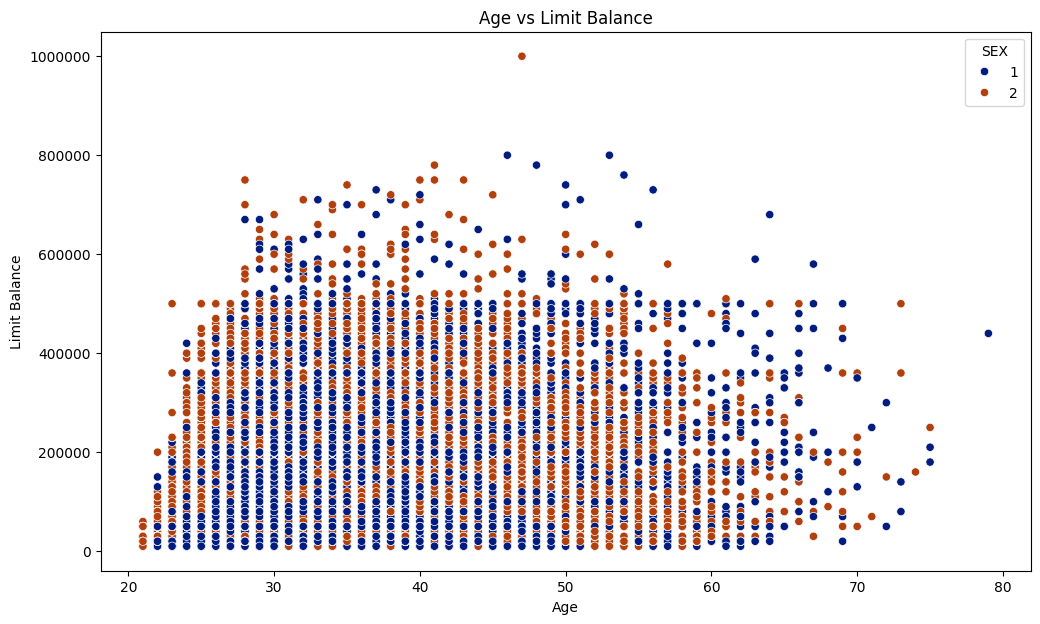

In [31]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='AGE', y='LIMIT_BAL', hue='SEX', palette='dark', data=df)
plt.ticklabel_format(style='plain', axis='y')  # show full numbers
plt.title('Age vs Limit Balance')
plt.xlabel('Age')
plt.ylabel('Limit Balance')
plt.show()


In [32]:
# most of the credit card users are 30 -50 age group and they have higher credit limit

In [33]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'default payment next month', 'MODE_PAY_STATUS', 'MODE_BILL_AMT',
       'MODE_PAY_AMT'],
      dtype='object')

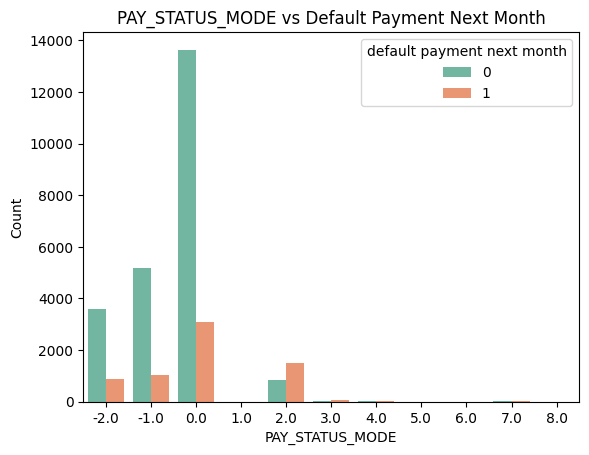

In [34]:
sns.countplot(x='MODE_PAY_STATUS', hue='default payment next month', data=df, palette='Set2')
plt.title('PAY_STATUS_MODE vs Default Payment Next Month')
plt.xlabel('PAY_STATUS_MODE')
plt.ylabel('Count')
plt.show()

In [35]:
# On time payment status has lower default rate as compared to late payment status

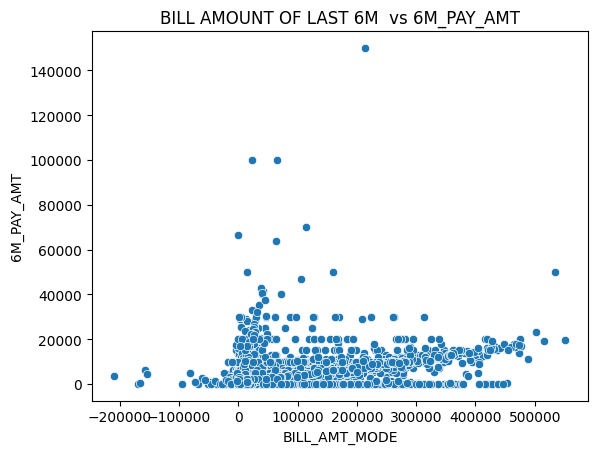

In [48]:
sns.scatterplot(x='MODE_BILL_AMT',y = 'MODE_PAY_AMT', data=df, palette='Set2', )
plt.title('BILL AMOUNT OF LAST 6M  vs 6M_PAY_AMT')
plt.xlabel('BILL_AMT_MODE')
plt.ylabel('6M_PAY_AMT')
plt.show()

In [ ]:
# most of 6 month bill amount in 0-300000 and 6 month pay amount are in 0-20000 range

In [ ]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,MODE_PAY_STATUS,MODE_BILL_AMT,MODE_PAY_AMT
0,20000,2,2,1,24,1,-2.0,0.0,0.0
1,120000,2,2,2,26,1,0.0,2682.0,1000.0
2,90000,2,2,2,34,0,0.0,13559.0,1000.0
3,50000,2,2,1,37,0,0.0,28314.0,1000.0
4,50000,1,2,1,57,0,0.0,5670.0,679.0
5,50000,1,1,2,37,0,0.0,19394.0,1000.0
6,500000,1,1,2,29,0,0.0,367965.0,13750.0
7,100000,2,2,2,23,0,-1.0,-159.0,0.0
8,140000,2,3,1,28,0,0.0,3719.0,1000.0
9,20000,1,3,2,35,0,-2.0,0.0,0.0


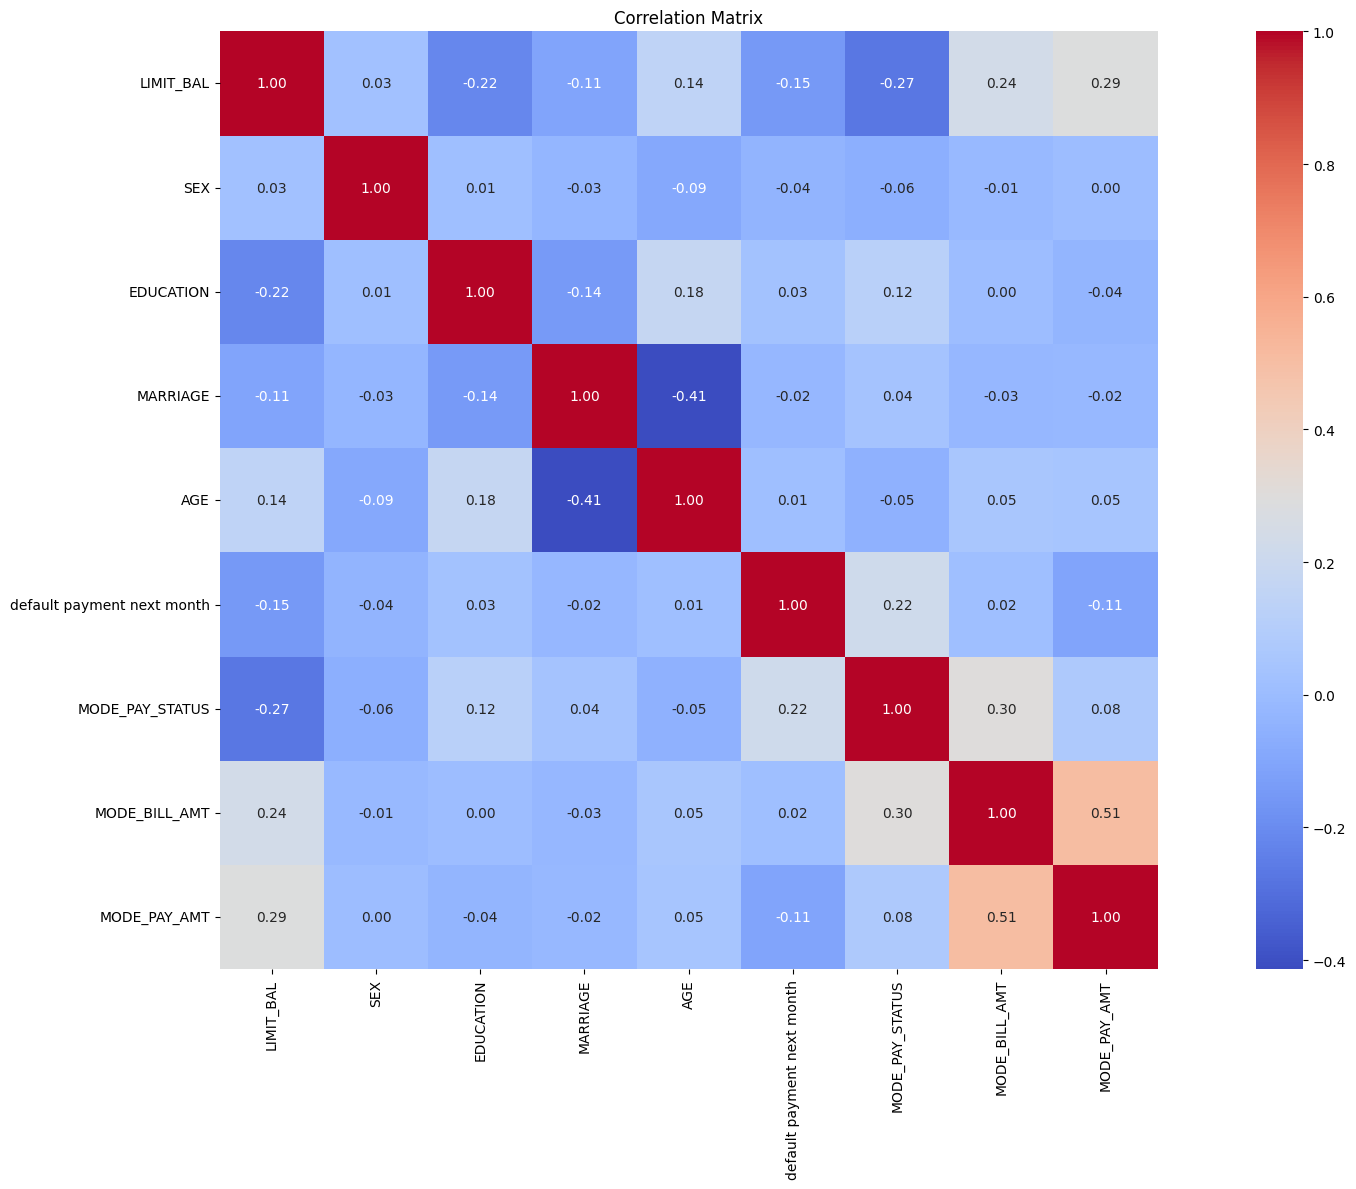

In [ ]:
# Multivariate analysis
corr = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# bill amount columns are highly correlated with each other
# pay status columns also shows some correlation with default payment next month

In [ ]:
# building ml classification model 
# Seperate X and y variable
X = df.drop(['default payment next month'],axis=1)
y = df['default payment next month']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
# Feature Scaling of data set
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# prediction on xtest data to y prediction
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)

In [ ]:
# Model Evaluation
accuracy_score

0.7868743047830923

In [ ]:
#hyperparameter tuning
#GridSearchCV
#RandomizedSearchCV


from sklearn.model_selection import GridSearchCV
params = {"penalty": ("l1", "l2", "elasticnet"), 'C': [1, 2, 10, 20, 30, 40]}

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [ ]:
clf = GridSearchCV(classifier, param_grid=params, cv = 5, verbose=2)


In [ ]:
clf.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penalt

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ('l1', 'l2', 'elasticnet')},
             verbose=2)

In [ ]:
clf.best_params_


{'C': 1, 'penalty': 'l2'}

In [ ]:
clf.best_score_


np.float64(0.794564958283671)

In [ ]:
#now prediction two ways, directly predict from best_estimator or build a separate model
y_pred = clf.best_estimator_.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6813  168]
 [1748  261]]
0.7868743047830923
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      6981
           1       0.61      0.13      0.21      2009

    accuracy                           0.79      8990
   macro avg       0.70      0.55      0.55      8990
weighted avg       0.75      0.79      0.73      8990



In [ ]:
# Using voting classifier for better accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
sv_clf = SVC()
gn_clf = GaussianNB()

In [ ]:
#for ensembles
from sklearn.ensemble import VotingClassifier

In [ ]:
ensemble_clf = VotingClassifier(estimators=[('logistic_reg', lr_clf), ("decision_tree_clf", dt_clf), ("support_vector_clf", sv_clf), ("gaussian", gn_clf)], voting="hard")


In [ ]:
ensemble_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('logistic_reg', LogisticRegression()),
                             ('decision_tree_clf', DecisionTreeClassifier()),
                             ('support_vector_clf', SVC()),
                             ('gaussian', GaussianNB())])

In [ ]:
y_pred = ensemble_clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7967741935483871

In [ ]:
# We get 79% accuracy which is quite good